# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random
import cv2

# Show images from a certain client from a certain set (training, test, validation)

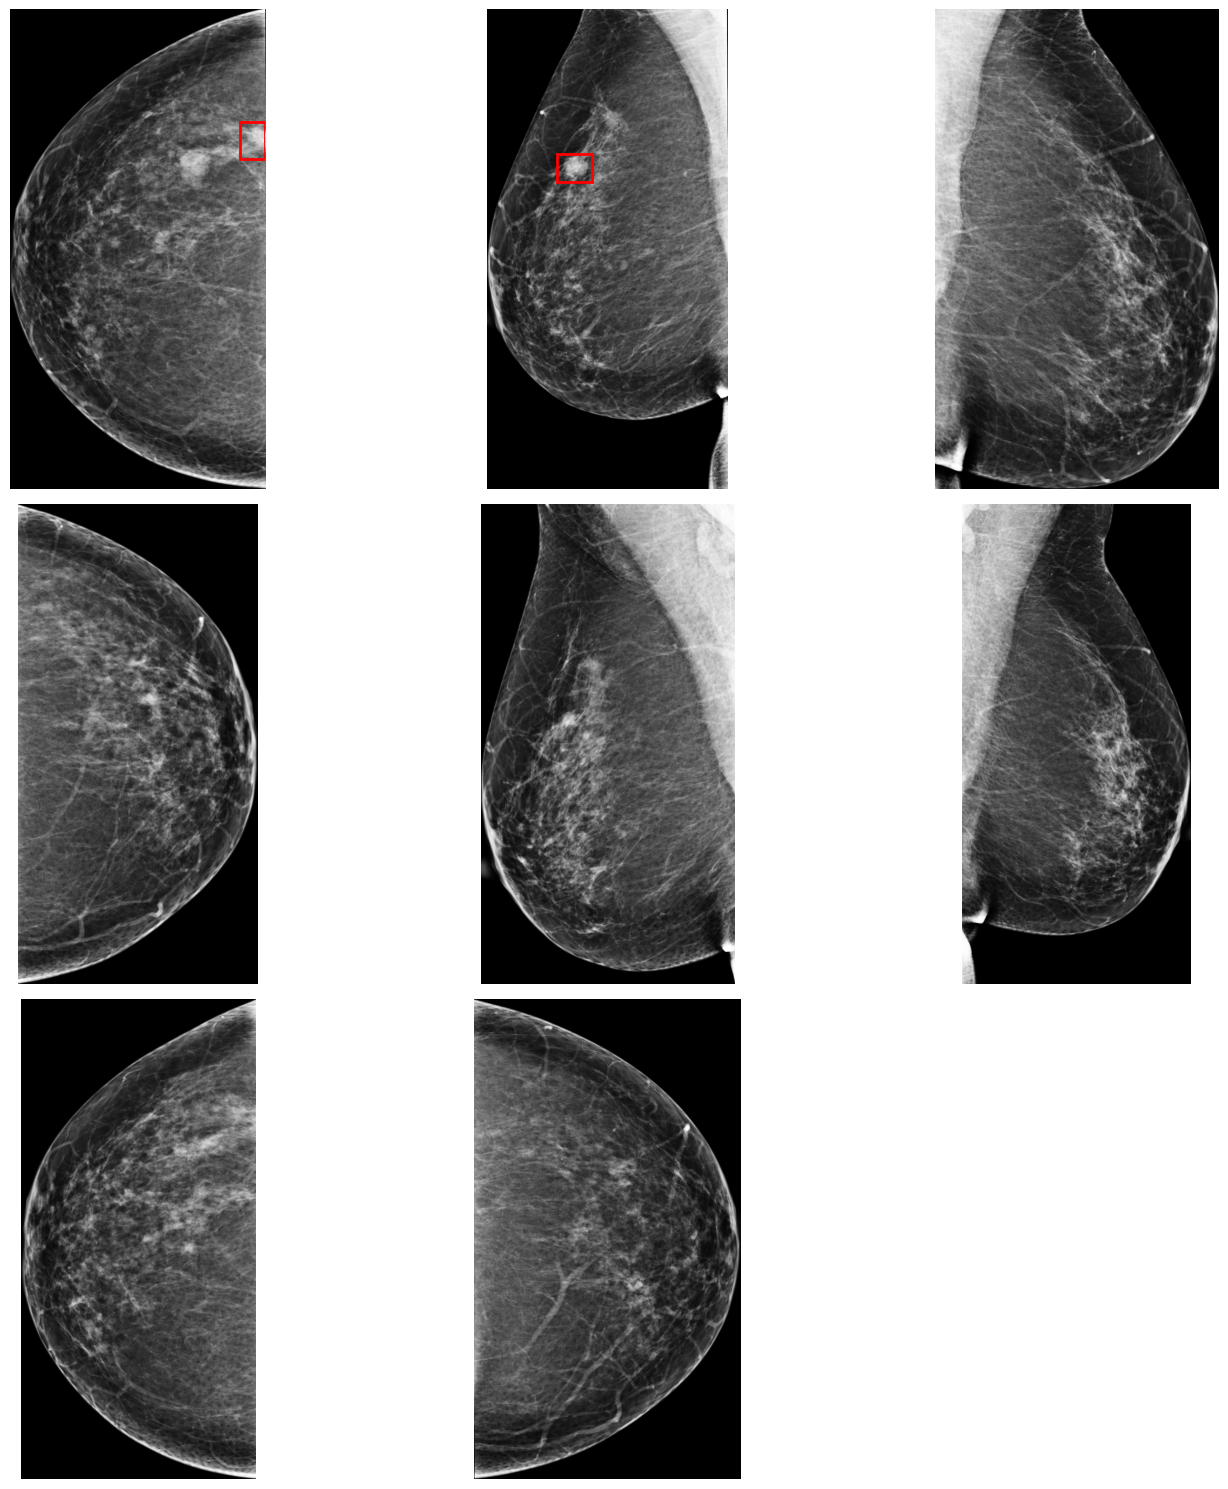

In [3]:
client_id = 'client_id'
base_path = 'train/'
csv_file = 'optimam_assets/client_images_screening.csv'

# Read CSV and filter for the specific client_id
df = pd.read_csv(csv_file)
client_data = df[df['client_id'] == client_id]

# Construct the path to the client's directory
client_path = os.path.join(base_path, client_id)

image_paths = []

# Walk through the directory to find all .png files
for root, dirs, files in os.walk(client_path):
    for file in files:
        if file.endswith(".png"):
            image_paths.append(os.path.join(root, file))

# Calculate the number of images and layout for plotting
num_images = len(image_paths)
num_cols = 3
num_rows = num_images // num_cols + (num_images % num_cols > 0)

# Set the figure size for the plot
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each image path
for i, img_path in enumerate(image_paths, 1):
    # Extract image_id from the filename correctly
    image_id = os.path.basename(img_path).rsplit('.', 1)[0]
    
    # Filter data for the current image_id
    image_data = client_data[client_data['image_id'] == image_id]

    # If data exists for this image_id, plot the image and bbox
    if not image_data.empty:
        image = Image.open(img_path)
        image_np = np.array(image)

        # Create subplot
        plt.subplot(num_rows, num_cols, i)
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        # Extract and draw rectangle for lesion location
        xmin, xmax, ymin, ymax = image_data[['xmin_cropped', 'xmax_cropped', 'ymin_cropped', 'ymax_cropped']].iloc[0].astype(int)
        x1, x2, y1, y2 = image_data[['x1', 'x2', 'y1', 'y2']].iloc[0]
        plt.gca().add_patch(plt.Rectangle((x1 - xmin, y1 - ymin), x2 - x1, y2 - y1, fill=False, edgecolor='red', lw=2))

    # If no data found for this image_id, print a message
    else:
        print(f"No data found for image ID: {image_id}")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

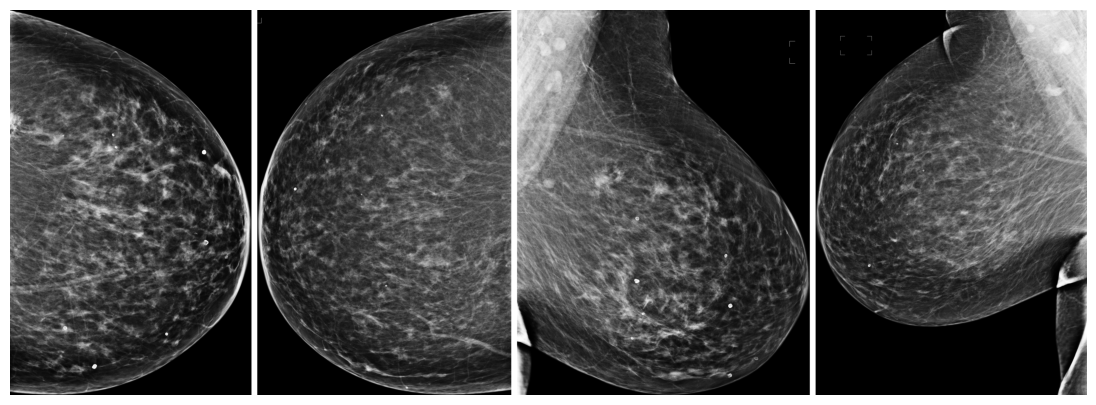

In [7]:
client_id = 'client_id'
base_path = 'val/'
csv_file = 'optimam_assets/client_images_screening.csv'

# Read CSV and filter for the specific client_id
df = pd.read_csv(csv_file)
client_data = df[df['client_id'] == client_id]

client_path = os.path.join(base_path, client_id)

image_paths = []

# Collect image paths
for root, dirs, files in os.walk(client_path):
    for file in files:
        if file.endswith(".png"):
            image_paths.append(os.path.join(root, file))

# Sort the images if needed and select the first four
image_paths = sorted(image_paths)[:4]

# Open images to get dimensions and find the smallest height
heights = [Image.open(img).height for img in image_paths]
common_height = min(heights)  # Use the smallest height to maintain maximum details

# Load images, resize them, and add a margin
images = []
margin_size = 50  # width of the margin in pixels
for img in image_paths:
    with Image.open(img) as image:
        new_width = int(common_height * image.width / image.height)
        resized_image = image.resize((new_width, common_height), Image.LANCZOS)
        # Add a white margin to the right of the image
        margin = np.full((common_height, margin_size), fill_value=255, dtype=np.uint8)
        image_with_margin = np.concatenate((np.array(resized_image), margin), axis=1)
        images.append(image_with_margin)

# Remove the margin from the last image
images[-1] = images[-1][:, :-margin_size]

# Concatenate images horizontally
full_image = np.concatenate(images, axis=1)

# Display the full image
plt.figure(figsize=(20, 5))
plt.imshow(full_image, cmap='gray')
plt.axis('off')
plt.show()

Manufacturer: Philips Digital Mammography Sweden AB
Manufacturer: HOLOGIC, Inc.
Manufacturer: Sectra Imtec AB
Manufacturer: SIEMENS
Manufacturer: GE MEDICAL SYSTEMS
Manufacturer: Philips Medical Systems


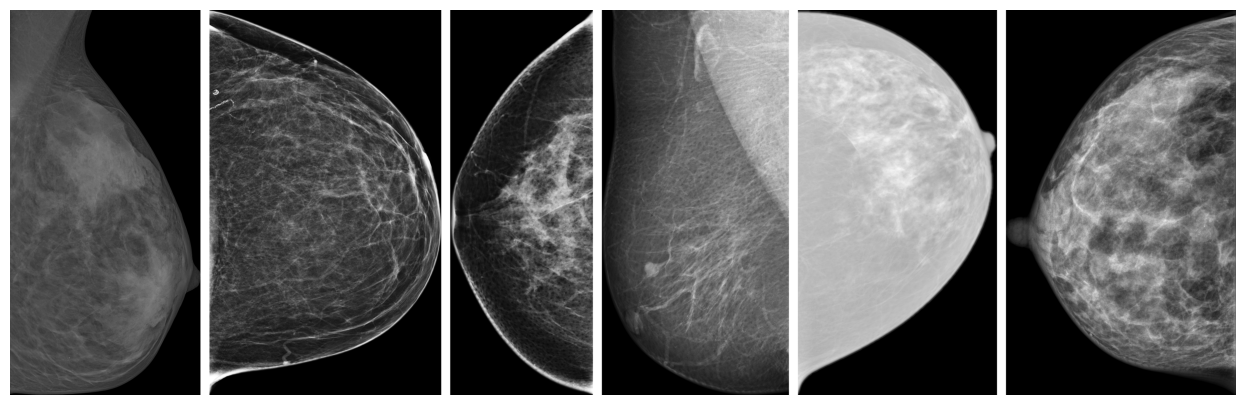

In [8]:
# Load the dataset
csv_file = 'optimam_assets/client_images_screening.csv'
df = pd.read_csv(csv_file)

# Base path to the images
base_path = '/'

# Function to find one image for a given client_id
def find_image_for_client(client_id):
    for subdir in ['test', 'train', 'val']:
        client_path = os.path.join(base_path, subdir, client_id)
        for root, dirs, files in os.walk(client_path):
            for file in files:
                if file.endswith(".png"):
                    return os.path.join(root, file)
    return None

# Get the list of manufacturers and collect one image per manufacturer
manufacturers = df['manufacturer'].unique()
image_paths = []
found_manufacturers = []

for manufacturer in manufacturers:
    manufacturer_data = df[df['manufacturer'] == manufacturer]
    client_ids = manufacturer_data['client_id'].unique()
    random.shuffle(client_ids)  # Randomize the order of client IDs
    for client_id in client_ids:
        image_path = find_image_for_client(client_id)
        if image_path:
            image_paths.append(image_path)
            found_manufacturers.append(manufacturer)
            print(f"Manufacturer: {manufacturer}")
            break  # Only take the first valid image for this manufacturer

# Check if we have image paths
if not image_paths:
    raise ValueError("No images found for any manufacturer.")

# Open images to get dimensions and find the smallest height
heights = [Image.open(img).height for img in image_paths]
common_height = min(heights)  # Use the smallest height to maintain maximum details

# Load images, resize them, and add a margin
images = []
margin_size = 50  # Width of the margin in pixels
for img in image_paths:
    with Image.open(img) as image:
        new_width = int(common_height * image.width / image.height)
        resized_image = image.resize((new_width, common_height), Image.LANCZOS)
        # Add a white margin to the right of the image
        margin = np.full((common_height, margin_size), fill_value=255, dtype=np.uint8)
        image_with_margin = np.concatenate((np.array(resized_image), margin), axis=1)
        images.append(image_with_margin)

# Remove the margin from the last image
if images:
    images[-1] = images[-1][:, :-margin_size]

# Concatenate images horizontally
if images:
    full_image = np.concatenate(images, axis=1)

    # Display the full image
    plt.figure(figsize=(20, 5))
    plt.imshow(full_image, cmap='gray')
    plt.axis('off')
    plt.show()

    # Optionally, save the full image
    output_path = 'combined_image.png'
    Image.fromarray(full_image).save(output_path)
else:
    print("No images to display.")


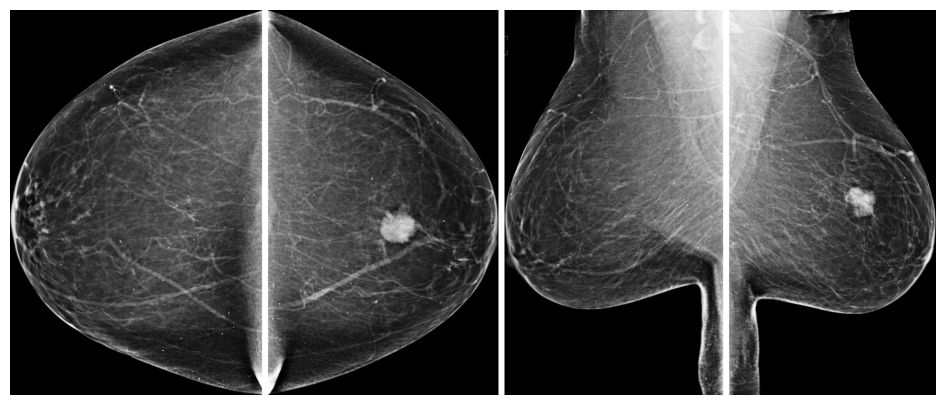

In [11]:
client_id = 'client_id'
base_path = '/'
csv_file = 'optimam_assets/client_images_screening.csv'

# Read CSV and filter for the specific client_id
df = pd.read_csv(csv_file)
client_data = df[df['client_id'] == client_id]

client_path = os.path.join(base_path, client_id)

image_paths = []

# Collect image paths
for root, dirs, files in os.walk(client_path):
    for file in files:
        if file.endswith(".png"):
            image_paths.append(os.path.join(root, file))

# Sort the images if needed and select the first four
image_paths = sorted(image_paths)[:4]

# Open images to get dimensions and find the smallest height
heights = [Image.open(img).height for img in image_paths]
common_height = min(heights)  # Use the smallest height to maintain maximum details

# Load images, resize them, and add a margin
images = []
margin_size = 50  # width of the margin in pixels
for img in image_paths:
    with Image.open(img) as image:
        new_width = int(common_height * image.width / image.height)
        resized_image = image.resize((new_width, common_height), Image.LANCZOS)
        # Add a white margin to the right of the image
        margin = np.full((common_height, margin_size), fill_value=255, dtype=np.uint8)
        image_with_margin = np.concatenate((np.array(resized_image), margin), axis=1)
        images.append(image_with_margin)

# Remove the margin from the last image
images[-1] = images[-1][:, :-margin_size]

# Concatenate images horizontally
full_image = np.concatenate(images, axis=1)

# Display the full image
plt.figure(figsize=(20, 5))
plt.imshow(full_image, cmap='gray')
plt.axis('off')
plt.show()

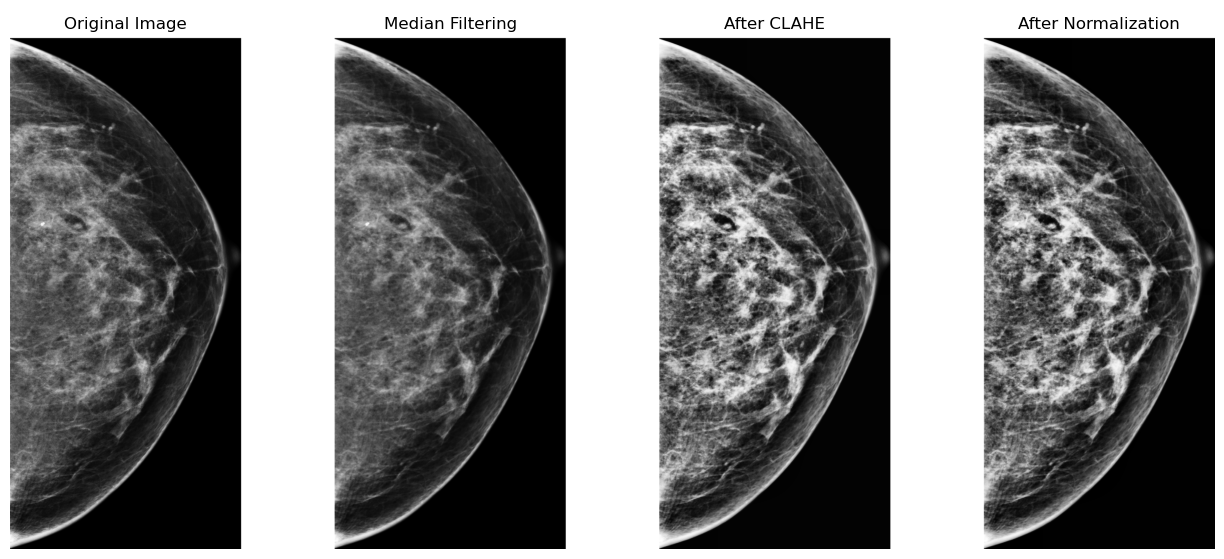

In [2]:
def preprocess_image(img_path):
    # Load image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Apply median filtering
    img_filtered = cv2.medianBlur(img, 5)

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_clahe = clahe.apply(img_filtered)

    # Z-score normalization
    img_normalized = (img_clahe - np.mean(img_clahe)) / np.std(img_clahe)
    img_normalized = cv2.normalize(img_normalized, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Define a small margin
    margin_size = 500
    height = img.shape[0]
    margin = np.full((height, margin_size), 255, dtype=np.uint8)

    # Concatenate images with margins
    images = [img, margin, img_filtered, margin, img_clahe, margin, img_normalized]
    concatenated_image = np.concatenate(images, axis=1)

    # Add titles
    titles = ["Original Image", "Median Filtering", "After CLAHE", "After Normalization"]
    title_height = 150  # Height of the title area
    title_image = np.full((title_height, concatenated_image.shape[1]), 255, dtype=np.uint8)

    # Calculate positions for titles
    single_image_width = img.shape[1]
    positions = [0, single_image_width + margin_size, 
                 2 * (single_image_width + margin_size), 
                 3 * (single_image_width + margin_size)]

    # Display the concatenated image with titles
    plt.figure(figsize=(20, 7))
    
    # Add the titles as text in the title image
    for i, (title, pos) in enumerate(zip(titles, positions)):
        plt.text(pos + single_image_width // 2, title_height / 2, title, fontsize=12, ha='center', va='center')

    # Combine title and concatenated image
    final_image = np.concatenate((title_image, concatenated_image), axis=0)
    
    plt.imshow(final_image, cmap='gray')
    plt.axis('off')
    plt.show()



preprocess_image('image')
